# Import's

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import os

# Configurações

In [2]:
## Valores de configuração:
menor = -10
maior = 10
qtd_populacao = 5
qtd_individuos = 4
porct_crossover = 0.7
porct_mutacao = 0.01

# Código

In [3]:
def cria_individuo(menor, maior): ## Cria um individuo, que terá um valor entre os parametros menor e maior, essa valor será em binário.
    size_individuo = len(format(max(abs(menor), abs(maior)), "b")) + 1 ## pega a quantidade de bits necessária para representa o maior valor, +1 do bit de negativo ou positivo
    valor_int = random.randint(menor, maior) ## Escolhe um valor entre os limites inferiores (menor) e superior (maior)
    valor_bin = [x for x in "{:0{}b}".format(abs(valor_int) & 2 ** size_individuo - 1, size_individuo)] ## Transoforma o número inteiro em binário com o tamanho de bits o tamanho de bits calculado, e salva em uma lista
    valor_bin[0] = "1" if valor_int < 0 else "0" ## Adiciona o bit de verificação se o número é negativo ou não, esse bit é o primeiro bit do vetor
    return valor_bin

In [4]:
def convert_int(valor_bin): ## Converte o valor binário em inteiro
    valor_str = "".join(x for x in valor_bin[1:]) ## Transforma o valor binário que está na lista em uma string, o bit de verificação se é negativo não é processado
    valor_int = int(valor_str, 2) ## Converte o valor binário (que está em uma string) em inteiro
    valor_int *= -1 if valor_bin[0] == "1" else 1 ## Verifica se o valor é negativo ou não, no bit de verificação se o número é negativo ou não
    return valor_int

In [5]:
def fitness(valor_int): ## Realiza a função fitness
    return (valor_int**2) - (3*valor_int) + 4

In [6]:
def rodeio(lista_individuos): ## Realiza o rodeio, escolhendo 2 individuos e devolvendo o melhor adaptado
    roleta = []
    for individuo in lista_individuos: ## Cria uma roleta com base na porcentagem destinada a cada individuo, ou porção destinada da roleta ao individuo
        for i in range(individuo[2]):
            roleta.append(individuo[:2])
    escolha_1 = random.choice(roleta) ## Seleciona um individuo
    escolha_2 = random.choice(roleta) ## Seleciona um individuo
    return escolha_1[0].copy() if escolha_1[1] > escolha_2[1] else escolha_2[0].copy() ## Devolve o individuo mais bem adaptado dos individuos selecionados

In [7]:
def verifica_valor(valor_bin, menor = menor, maior = maior): ## Verifica se o valor não extrapolou os limites
    valor_int = convert_int(valor_bin) ## Converte o valor em binário para inteiro
    return True if (menor <= valor_int <= maior) else False ## Devolve True, caso o valor esteja dentro do limite e False caso contrário

In [8]:
def crossover(porct, individuo_1, individuo_2): ## Realiza o crossover entre 2 individuos
    qtd_posicoes = math.ceil(len(individuo_1) * porct) ## Calcula quantas posições devem ser trocadas entre os individuos
    posicoes_trocadas = []
    aux_individuo_1 = individuo_1.copy() ## Realiza a cópia do individuo 1
    aux_individuo_2 = individuo_2.copy() ## Realiza a cópia do individuo 2
    for i in range(qtd_posicoes):
        posicao = random.randint(0, len(individuo_1) - 1) ## Escolhe um posição aleatória dos individuos para ser trocada
        while posicao in posicoes_trocadas: ## Não permite que troque a mesma posição mais de uma vez
            posicao = random.randint(0, len(individuo_1) - 1)
        ## Realiza a troca de posições - Inicio
        aux = aux_individuo_1[posicao]
        aux_individuo_1[posicao] = aux_individuo_2[posicao]
        aux_individuo_2[posicao] = aux
        ############################## - Fim
        posicoes_trocadas.append(posicao)
    ## Retorna os filhos gerados do crossover, verificando se o valor deles não extrapolou os limites, caso extrapole retorna o valor sem crossover
    return aux_individuo_1 if verifica_valor(aux_individuo_1) else individuo_1, aux_individuo_2 if verifica_valor(aux_individuo_2) else individuo_2

In [9]:
def mutacao(porct, lista_individuos): ## Realiza a mutação de um individuo
    posicao_individuo = random.randint(0, len(lista_individuos) - 1) ## Escolhe aleatoriamente qual individuo soferá a mutação
    aux_individuo = lista_individuos[posicao_individuo].copy() ## Realiza a cópia do individuo
    qtd_posicoes = math.ceil(len(aux_individuo) * porct) ## Calcula quantas posições deve ser mutadas
    posicoes_trocadas = []
    for i in range(qtd_posicoes):
        posicao = random.randint(0, len(aux_individuo) - 1)
        while posicao in posicoes_trocadas: ## Escolhe um posição aleatória dos individuos para ser trocada
            posicao = random.randint(0, len(aux_individuo) - 1) ## Não permite que troque a mesma posição mais de uma vez
        ## Realiza a mutação de posições - Inicio
        aux_individuo[posicao] = "1" if aux_individuo[posicao] == "0" else "0"
        ############################## - Fim
        posicoes_trocadas.append(posicao)
    ## Verifica se a mutação no individuo não extrapolou os limites, caso extrapole desfaz a mutação
    lista_individuos[posicao_individuo] = aux_individuo if verifica_valor(aux_individuo) else lista_individuos[posicao_individuo]
    return lista_individuos

In [10]:
def imprimi(lista_individuos): ## Imprimi informações dos individuos presente na geração
    print("Individuos da geração: ")
    for individuo in lista_individuos:
        print("Individuo: " + str(individuo[0]) + " Valor: " + str(convert_int(individuo[0])) + " Fitness: " + str(individuo[1]) + " Porção na roleta: " + str(individuo[2]) + " pedaços")
    print("###########################################################################")

In [11]:
def exibi_grafico(maior, menor, lista_individuos, geracao): ## Exibi o gráfico
    variaveis = np.arange(menor, maior+1, 1) ## Pega todos os possiveis valores inteiros dentro do intervalo
    plt.plot(variaveis, [fitness(x) for x in variaveis]) ## Plot: desenho da função
    ## Pega os individuos da geração
    lista_aux = [x[0] for x in lista_individuos] if len(lista_individuos[0]) == 3 else lista_individuos
    for individuo in lista_aux:
        plt.scatter(convert_int(individuo), fitness(convert_int(individuo)), c='red') ## Plot: Individuos no gráfico
        plt.text(convert_int(individuo), fitness(convert_int(individuo)), individuo, ha = "center", weight = "bold") ## Plot: Informações dos individuos no gráfico
    plt.xlabel("Valores dos indivíduos (inteiro)")
    plt.ylabel("Valores do fitness")
    plt.title((str(geracao+1) + "º Geração:") if geracao < qtd_populacao else "Geração final:")
    plt.show()

In [12]:
def step(geracao, lista_individuos): ## Metodo para fazer o passo-a-passo, e poder verificar o desenvolver de cada geração
    if geracao < qtd_populacao:
        print(str(geracao+1) + "º Geração:")
        if not lista_individuos: ## Cria os individuos, caso não existam
            for i in range(qtd_individuos): 
                lista_individuos.append(cria_individuo(menor, maior)) ## Cria os individuos
        somatorio_resultados = 0
        for index, individuo in enumerate(lista_individuos): ## Realiza o fitness dos individuos da geração
            lista_individuos[index] = [individuo, fitness(convert_int(individuo))]
            somatorio_resultados += lista_individuos[index][1]
        lista_individuos = [[x[0], x[1], round((x[1]/ somatorio_resultados)*10)] for x in lista_individuos]
        imprimi(lista_individuos)
        exibi_grafico(maior, menor, lista_individuos, geracao)
        novos_individuos = []
        for i in range(int(qtd_individuos/2)): ## Gera os filhos, realizando os rodeios e o crossover, para criação dos filhos dos individuos selecionados
            escolha_1 = rodeio(lista_individuos) ## Escolhe um individuo
            print("Escolha " + str(2*i+1) + ": " + str(escolha_1))
            escolha_2 = rodeio(lista_individuos) ## Escolhe um individuo
            print("Escolha " + str(2*i+2) + ": " + str(escolha_2))
            novos_individuos += crossover(porct_crossover, escolha_1, escolha_2) ## Realiza o crossover
        print("Filhos gerados: " + str(novos_individuos))
        lista_individuos = mutacao(porct_mutacao, novos_individuos) ## Realiza  amutação em um dos filhos
        print("Filhos gerados (com mutação): " + str(lista_individuos))
        geracao += 1 ## Adiciona mais um, para contabilizar a geração
    else: ## Para quando acabar as gerações
        print("Individuos melhores adaptados: ")
        print("\n".join("Individuo: " + str(individuo) + " Valor: "  + str(convert_int(individuo)) + " Fitness: " + str(fitness(convert_int(individuo))) for individuo in lista_individuos))
        exibi_grafico(maior, menor, lista_individuos, geracao)
    return geracao, lista_individuos

### Set inicial dos valores

In [13]:
lista_individuos = [] ## Lista de individuos na geração
geracao = 0 ## Geração

### Step

Individuos melhores adaptados: 
Individuo: ['1', '1', '0', '0', '1'] Valor: -9 Fitness: 112
Individuo: ['1', '1', '0', '0', '1'] Valor: -9 Fitness: 112
Individuo: ['1', '1', '0', '0', '0'] Valor: -8 Fitness: 92
Individuo: ['1', '1', '0', '0', '0'] Valor: -8 Fitness: 92


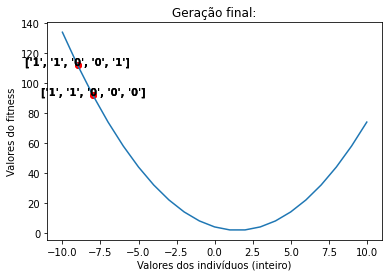

In [19]:
geracao, lista_individuos = step(geracao, lista_individuos) ## Realiza o passo-a-passo, para poder verificar o desenvolver de cada geração